In [29]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [21]:
df=pd.read_csv('Google_Stock_Price_Test.csv')
df

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600
...,...,...,...,...,...,...
120,25/06/2018,1143.599976,1143.910034,1112.780029,1124.810059,2157300
121,26/06/2018,1128.000000,1133.209961,1116.659058,1118.459961,1563200
122,27/06/2018,1121.339966,1131.836060,1103.619995,1103.979980,1293900
123,28/06/2018,1102.089966,1122.310059,1096.010010,1114.219971,1072400


In [22]:
trained_data=df.iloc[:,1:2].values


In [23]:
scaler=MinMaxScaler(feature_range=(0,1))
trained_data_Scaled=scaler.fit_transform(trained_data)

In [26]:
def createsequence(data,sequence_length):
    x,y=[],[]
    for i in range(len(data)-sequence_length):
        x.append(data[i:(i+sequence_length),0])
        y.append(data[i+sequence_length])
    return np.array(x),np.array(y)

In [41]:
sequence_length=60
x_train,y_train=createsequence(trained_data_Scaled,sequence_length)


In [42]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
his=model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20


C:\Users\Dell\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2571
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1458
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0512
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0888
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0889
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0456
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0503
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0641
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0704
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0649
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0551
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0405
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0348
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0387
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0484
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


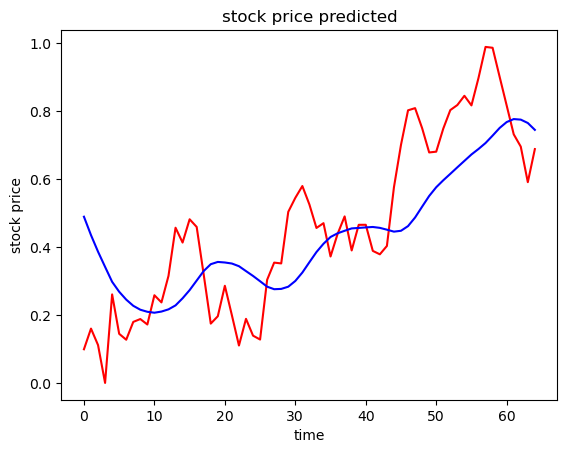

In [40]:
x_train_reshaped = x_train.reshape(-1, x_train.shape[1])  # Flatten the last dimension

# Inverse transform the input features
x_train_original_scale = scaler.inverse_transform(x_train_reshaped)
y_pred=model.predict(x_train)
import matplotlib.pyplot as plt
plt.plot(y_train,color='red',label='Actual_price_predicted')
plt.plot(y_pred,color='blue',label='predicted_price')
plt.title('stock price predicted')
plt.xlabel('time')
plt.ylabel('stock price')
plt.show()